minimum speed: 0.0
maximum speed: 19.6
histogram length unfiltered for month: 52894


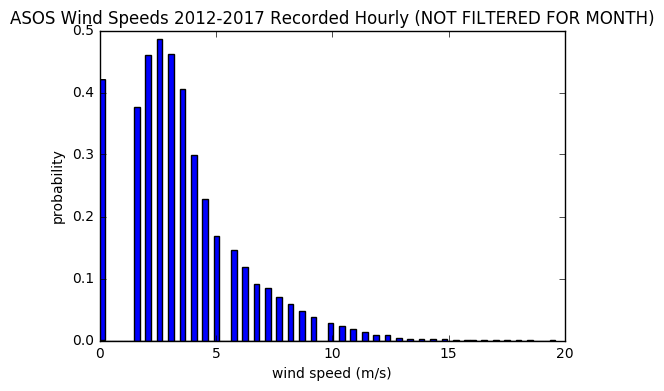

polar direction length unfiltered for month: 52894
0.0
5.18962453208


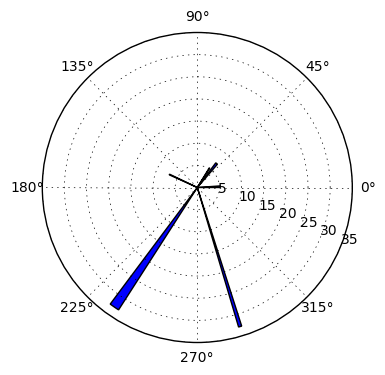

In [67]:
#generates the histogram without extracting for a certain date and polar plot
#import pprint
#from IPython.display import display
#import platform

import matplotlib.pyplot as plt #helps make histograms
from scipy import stats
import numpy as np

#creates class wind tags that holds the date and time

class WindDate: 
    #hr is stored in the 24-hr clock
    def __init__(self,year,month,day,hr):
        self.y = year
        self.m = month
        self.d = day
        self.hour = hr
    
    #useful tool for printing accessed values in the map
    def __str__(self):
        return "the year is: " + str(self.y) + "the month is" + str(self.m) + "the day is: " + str(self.d) + "the hour is: " + str(self.hour)
    
    #add functions that allow for lookups - asks "my month, day, hour, same as theirs?"
    def __eq__(self,other):
        return (self.m == other.m and self.d == other.d and self.hour == other.hour and self.y == other.y)
        
    #python compares key values by asking if they are the same memory address, not same content. so the program needs this hash function to allow for key lookups
    def __hash__(self):
        return self.d + self.y + self.m + self.hour #TODO: make more efficient so you can't allow the stuff to get hashed into the same bucket

#creates class that holds the wind values - includes direction and speed
class WindValues:
    #hr is stored in the 24-hr clock
    def __init__(self,direction, speed):
        self.d = direction
        self.s = speed

    #useful tool for printing accessed values in the map
    def __str__(self):
        return "the direction is: " + str(self.d) + "the month is" + str(self.s)
        
#parses the textfile, populating a hashmap with those classes for each wind date and wind value
advance_amt = 44 #num characters the filereader needs to move right before reaching the start of the date entry
parse_length = 87 #num characters the line that starts with the date goes to
data_file = open('hourly ASOS data 2012-2017.txt') 

#advances file to line where info actually starts (past title line and category headings line)
data_file.readline()
data_file.readline()

#create the dictionary (python's map) that we're going to add the file vals to
windMap = {} #format for initializing a dictionary

while(True):
    currentLine = data_file.readline()
    if(currentLine == ""):
        break 
    
    #extracts the data that's different from each line in the data file (some stuff like location is always the same)
    toParse = currentLine[44:87]
    parsedVals = toParse.split(",") #windTag variables and WindValues variables all stored in single list entry because there is no comma separating them 
    
    #populate the class variables for an individual line in the file
    dateInfo = parsedVals[0]
    y = int(dateInfo[0:4])
    m = int(dateInfo[4:6])
    d = int(dateInfo[6:8])
    hour = int(parsedVals[1])
    
    windKey = WindDate(y,m,d,hour)
    
    #tests hashing function
    #if(windKey.m == 1 and windKey.d == 18 and windKey.y == 2012 and windKey.hour == 153):
       #print(windKey)
    
    #populate the wind vals class
    #skip over the empty space that gets parsed in list entry 5
    direction = int(parsedVals[6])
    speed = float(parsedVals[8].strip())
    specificWindVals = WindValues(direction,speed)

    #add both populated classes to the map
    if(specificWindVals.s != 999.9 and specificWindVals.d != 999): #ensures that the error directions aren't added
        windMap[windKey] = specificWindVals


data_file.close() #frees up any system allocations taken up by the file. TODO: call closer later?

#test the program by accessing different values in the map

#TODO: break up parsing file and graphic creating file

windValues = windMap.values()

###
#create the histogram for speed

HIST_PRECISION = 80 #sets the number of intervals displayed on the x axis

#get the wind speeds
histogramSpeeds = []

for windVal in windValues:
    speed = windVal.s 
    histogramSpeeds.append(speed)

#populate the histogram

#error checks - if the max or min is outside the expected range of the data file, the user can infer that some value is not correctly parsed
print("minimum speed: " + str(min(histogramSpeeds)))
print("maximum speed: " + str(max(histogramSpeeds)))

print("histogram length unfiltered for month: " + str(len(histogramSpeeds)))
plt.hist(histogramSpeeds, bins= HIST_PRECISION, normed=True)
plt.title('ASOS Wind Speeds 2012-2017 Recorded Hourly (NOT FILTERED FOR MONTH)')
plt.xlabel('wind speed (m/s)')
plt.ylabel('probability')
plt.show()
###

###
#create the polar plot for direction

#create the subplot with the angle backgrounds

polarPlot = plt.subplot(111, polar = True)

#get the direction values from the map
polarDirections = [] #TODO: may need to change the data format into a vector so that pyplot will plot
for windVal in windValues:
    direction = windVal.d 
    polarDirections.append(direction)

print("polar direction length unfiltered for month: " + str(len(polarDirections)))
#make a polar plot with the plt function#
directionProbabilities, theta, _ = plt.hist(polarDirections, bins = 360, normed = True)

print(directionProbabilities[1])
print(directionProbabilities[0])
#create the direction value vector for the polar plot
theta = np.arange(0,360,1)

width = (2*np.pi) / ((len(theta))/4)
polarPlot = plt.subplot(111, polar=True)
bars = polarPlot.bar(theta, directionProbabilities, width=width)
polarPlot.set_rlabel_position(-22.5)
polarPlot.grid(True)

plt.show()

#make a polar plot with the hist function#



###

histogram length unfiltered for month: 8749
minimum speed: 0.0
maximum speed: 16.0


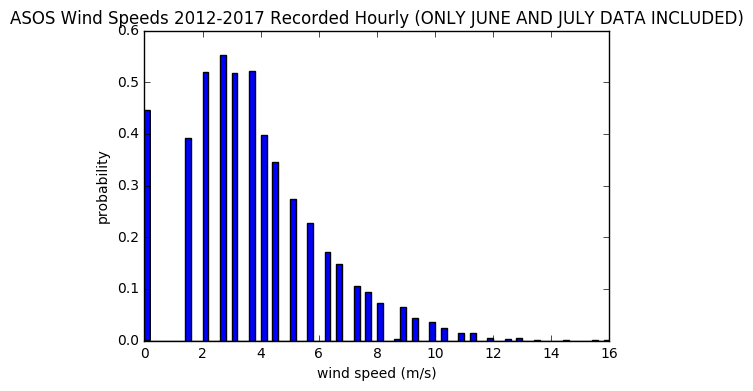

polar direction length filtered for month: 8749
0.0
5.22059663962


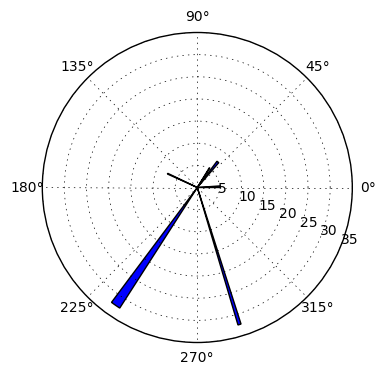

In [69]:
#extracts the months june and july for the histogram and polar plot

# -*- coding: utf-8 -*-

#import pprint
#from IPython.display import display
#import platform

import matplotlib.pyplot as plt #helps make histograms
from scipy import stats
import numpy as np

#creates class wind tags that holds the date and time

class WindDate: 
    #hr is stored in the 24-hr clock
    def __init__(self,year,month,day,hr):
        self.y = year
        self.m = month
        self.d = day
        self.hour = hr
    
    #useful tool for printing accessed values in the map
    def __str__(self):
        return "the year is: " + str(self.y) + "the month is" + str(self.m) + "the day is: " + str(self.d) + "the hour is: " + str(self.hour)
    
    #add functions that allow for lookups - asks "my month, day, hour, same as theirs?"
    def __eq__(self,other):
        return (self.m == other.m and self.d == other.d and self.hour == other.hour and self.y == other.y)
        
    #python compares key values by asking if they are the same memory address, not same content. so the program needs this hash function to allow for key lookups
    def __hash__(self):
        return self.d + self.y + self.m + self.hour #TODO: make more efficient so you can't allow the stuff to get hashed into the same bucket

#creates class that holds the wind values - includes direction and speed
class WindValues:
    #hr is stored in the 24-hr clock
    def __init__(self,direction, speed):
        self.d = direction
        self.s = speed

    #useful tool for printing accessed values in the map
    def __str__(self):
        return "the direction is: " + str(self.d) + "the month is" + str(self.s)
        
#parses the textfile, populating a hashmap with those classes for each wind date and wind value
advance_amt = 44 #num characters the filereader needs to move right before reaching the start of the date entry
parse_length = 87 #num characters the line that starts with the date goes to
data_file = open('hourly ASOS data 2012-2017.txt') 

#advances file to line where info actually starts (past title line and category headings line)
data_file.readline()
data_file.readline()

#create the dictionary (python's map) that we're going to add the file vals to
windMap = {} #format for initializing a dictionary

while(True):
    currentLine = data_file.readline()
    if(currentLine == ""):
        break 
    
    #extracts the data that's different from each line in the data file (some stuff like location is always the same)
    toParse = currentLine[44:87]
    parsedVals = toParse.split(",") #windTag variables and WindValues variables all stored in single list entry because there is no comma separating them 
    
    #populate the class variables for an individual line in the file
    dateInfo = parsedVals[0]
    y = int(dateInfo[0:4])
    m = int(dateInfo[4:6])
    d = int(dateInfo[6:8])
    hour = int(parsedVals[1])
    
    windKey = WindDate(y,m,d,hour)
    
    #tests hashing function
    #if(windKey.m == 1 and windKey.d == 18 and windKey.y == 2012 and windKey.hour == 153):
       #print(windKey)
    
    #populate the wind vals class
    #skip over the empty space that gets parsed in list entry 5
    direction = int(parsedVals[6])
    speed = float(parsedVals[8].strip())
    specificWindVals = WindValues(direction,speed)

    #add both populated classes to the map
    if(specificWindVals.s != 999.9 and specificWindVals.d != 999): #ensures that the error directions aren't added
        windMap[windKey] = specificWindVals


data_file.close() #frees up any system allocations taken up by the file. TODO: call closer later?

#test the program by accessing different values in the map

#TODO: break up parsing file and graphic creating file

windValues = windMap.values()
windKeys = windMap.keys()

###
#create the histogram for speed

HIST_PRECISION = 80 #sets the number of intervals displayed on the x axis

#get the wind speeds
histogramSpeeds = []

for windKey in windKeys:
    if(windKey.m == 6 or windKey.m == 7):
        windVal = windMap[windKey]
        speed = windVal.s 
        histogramSpeeds.append(speed)
        
#populate the histogram
print("histogram length unfiltered for month: " + str(len(histogramSpeeds)))

#error checks - if the max or min is outside the expected range of the data file, the user can infer that some value is not correctly parsed
print("minimum speed: " + str(min(histogramSpeeds)))
print("maximum speed: " + str(max(histogramSpeeds)))


plt.hist(histogramSpeeds, bins= HIST_PRECISION, normed=True)
plt.title('ASOS Wind Speeds 2012-2017 Recorded Hourly (ONLY JUNE AND JULY DATA INCLUDED)')
plt.xlabel('wind speed (m/s)')
plt.ylabel('probability')
plt.show()
###

###
#create the polar plot for direction

#create the subplot with the angle backgrounds

polarPlot = plt.subplot(111, polar = True)

#get the direction values from the map
polarDirections = [] #TODO: may need to change the data format into a vector so that pyplot will plot
for windKey in windKeys:
    if(windKey.m == 6 or windKey.m == 7):
        windVal = windMap[windKey]
        direction = windVal.d
        polarDirections.append(direction)

print("polar direction length filtered for month: " + str(len(polarDirections)))
#make a polar plot with the plt function#
directionProbabilities, theta, _ = plt.hist(polarDirections, bins = 360, normed = True)

print(directionProbabilities[1])
print(directionProbabilities[0])
#create the direction value vector for the polar plot
theta = np.arange(0,360,1)

width = (2*np.pi) / ((len(theta))/4)
polarPlot = plt.subplot(111, polar=True)
bars = polarPlot.bar(theta, directionProbabilities, width=width)
polarPlot.set_rlabel_position(-22.5)
polarPlot.grid(True)

plt.show()

#make a polar plot with the hist function#



###

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[5.3640502354788069, 5.1695783132530124, 4.3517027863777091, 3.9679127725856707, 3.8669724770642215, 3.6028481012658236, 3.5043689320388354, 3.3948717948717957, 3.1822580645161298, 3.2044303797468361, 2.8977419354838712, 2.8603174603174608, 2.6797697368421054, 2.5061688311688313, 2.6188311688311687, 2.6635761589403977, 2.9122033898305086, 3.2827702702702704, 3.3446519524617999, 4.0855670103092789, 4.3993589743589752, 5.0161585365853663, 5.2879879879879885, 5.4154970760233931]


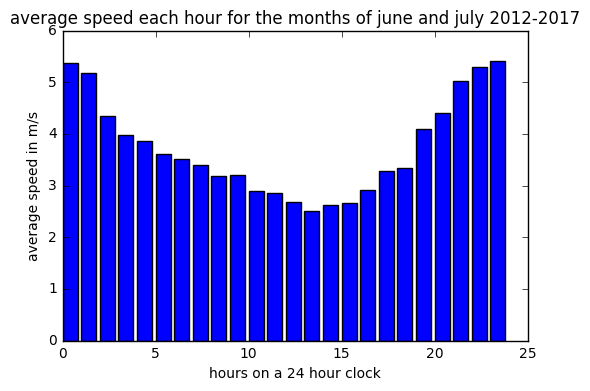

In [66]:
#makes the average graph

# -*- coding: utf-8 -*-

#import pprint
#from IPython.display import display
#import platform

import matplotlib.pyplot as plt #helps make histograms
from scipy import stats
import numpy as np

#creates class wind tags that holds the date and time

class WindDate: 
    #hr is stored in the 24-hr clock
    def __init__(self,year,month,day,time_in_minutes):
        self.y = year
        self.m = month
        self.d = day
        self.time = time_in_minutes
    
    #useful tool for printing accessed values in the map
    def __str__(self):
        return "the year is: " + str(self.y) + "the month is" + str(self.m) + "the day is: " + str(self.d) + "the total minutes is: " + str(self.time)
    
    #add functions that allow for lookups - asks "my month, day, hour, same as theirs?"
    def __eq__(self,other):
        return (self.m == other.m and self.d == other.d and self.time == other.time and self.y == other.y)
        
    #python compares key values by asking if they are the same memory address, not same content. so the program needs this hash function to allow for key lookups
    def __hash__(self):
        return self.d + self.y + self.m + self.time #TODO: make more efficient so you can't allow the stuff to get hashed into the same bucket

#creates class that holds the wind values - includes direction and speed
class WindValues:
    #hr is stored in the 24-hr clock
    def __init__(self,direction, speed):
        self.d = direction
        self.s = speed

    #useful tool for printing accessed values in the map
    def __str__(self):
        return "the direction is: " + str(self.d) + "the month is" + str(self.s)
        
#parses the textfile, populating a hashmap with those classes for each wind date and wind value
advance_amt = 44 #num characters the filereader needs to move right before reaching the start of the date entry
parse_length = 87 #num characters the line that starts with the date goes to
data_file = open('hourly ASOS data 2012-2017.txt') 

#advances file to line where info actually starts (past title line and category headings line)
data_file.readline()
data_file.readline()

#create the dictionary (python's map) that we're going to add the file vals to
windMap = {} #format for initializing a dictionary

while(True):
    currentLine = data_file.readline()
    if(currentLine == ""):
        break 
    
    #extracts the data that's different from each line in the data file (some stuff like location is always the same)
    toParse = currentLine[44:87]
    parsedVals = toParse.split(",") #windTag variables and WindValues variables all stored in single list entry because there is no comma separating them 
    
    #populate the class variables for an individual line in the file
    dateInfo = parsedVals[0]
    y = int(dateInfo[0:4])
    m = int(dateInfo[4:6])
    d = int(dateInfo[6:8])
    time_in_minutes = int(parsedVals[1][0:2])*60 + int(parsedVals[1][2:4])
    
    windKey = WindDate(y,m,d,time_in_minutes)
    
    #tests hashing function
    #if(windKey.m == 1 and windKey.d == 18 and windKey.y == 2012 and windKey.hour == 153):
       #print(windKey)
    
    #populate the wind vals class
    #skip over the empty space that gets parsed in list entry 5
    direction = int(parsedVals[6])
    speed = float(parsedVals[8].strip())
    specificWindVals = WindValues(direction,speed)

    #add both populated classes to the map
    if(specificWindVals.s != 999.9 and specificWindVals.d != 999): #ensures that the error directions aren't added
        windMap[windKey] = specificWindVals


data_file.close() #frees up any system allocations taken up by the file. TODO: call closer later?

#test the program by accessing different values in the map

#TODO: break up parsing file and graphic creating file

windValues = windMap.values()
windKeys = windMap.keys()

###
#create the histogram for speed

HIST_PRECISION = 80 #sets the number of intervals displayed on the x axis


#make a bar graph with the average speed at each hour and plot with respect to time

#initialize the dictionary to all empty lists:
beforeAverageMap = {} #format for initializing a dictionary
for i in range(0,24):
    beforeAverageMap[i] = []

for windKey in windKeys:
    if(windKey.m == 6 or windKey.m == 7):
        time_in_minutes = windKey.time
        hour = int(time_in_minutes/60)
        beforeAverageMap[hour].append(windMap[windKey].s)

averagedMap = {}
averaged_speeds_list = [0]*24
    
for index in range(0,24):
    avg_speed = np.mean(beforeAverageMap[index])
    averagedMap[index] = avg_speed
    averaged_speeds_list[index] = avg_speed

hours_to_plot = np.arange(0,24) #must create the dependent variable as a numpy array for matplotlib to accept the array
print(hours_to_plot)
print(averaged_speeds_list)
    
numpy_speeds = np.asarray(averaged_speeds_list) #must transfer to a numpy array for matplotlib to accept the array as an input

plt.bar(hours_to_plot, numpy_speeds)
plt.ylabel('average speed in m/s')
plt.xlabel('hours on a 24 hour clock')
plt.title('average speed each hour for the months of june and july 2012-2017')
plt.show()